In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 1.14.0


In [23]:
from livelossplot import PlotLossesKerasTF

In [24]:
for exp in os.listdir('E:\\Python\\Face expression\\face-expression-recognition-dataset\\images\\train'):
    #print(exp)
    print(exp,'=',len(os.listdir('E:\\Python\\Face expression\\face-expression-recognition-dataset\\images\\train\\'+exp)))

angry = 3993
disgust = 436
fear = 4103
happy = 7164
neutral = 4982
sad = 4938
surprise = 3205


In [25]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory('E:\\Python\\Face expression\\face-expression-recognition-dataset\\images\\train\\',
                                target_size=(img_size,img_size),
                                color_mode='grayscale',
                                batch_size=batch_size,
                                class_mode='categorical',
                                shuffle=True)
datagen_test=ImageDataGenerator(horizontal_flip=True)
test_generator=datagen_test.flow_from_directory('E:\\Python\\Face expression\\face-expression-recognition-dataset\\images\\validation\\',
                                target_size=(img_size,img_size),
                                color_mode='grayscale',
                                batch_size=batch_size,
                                class_mode='categorical',
                                shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
train_generator[4]

(array([[[[129.],
          [ 21.],
          [ 17.],
          ...,
          [198.],
          [200.],
          [201.]],
 
         [[ 46.],
          [  8.],
          [  9.],
          ...,
          [197.],
          [197.],
          [199.]],
 
         [[  7.],
          [  7.],
          [  6.],
          ...,
          [184.],
          [195.],
          [194.]],
 
         ...,
 
         [[ 48.],
          [ 39.],
          [ 12.],
          ...,
          [ 99.],
          [ 24.],
          [119.]],
 
         [[ 57.],
          [ 54.],
          [ 17.],
          ...,
          [104.],
          [ 21.],
          [104.]],
 
         [[ 67.],
          [ 46.],
          [ 33.],
          ...,
          [107.],
          [ 23.],
          [ 98.]]],
 
 
        [[[ 60.],
          [ 85.],
          [147.],
          ...,
          [207.],
          [207.],
          [206.]],
 
         [[ 62.],
          [100.],
          [156.],
          ...,
          [197.],
          [1

In [29]:
model=Sequential()
# 1 conv
model.add(Conv2D(32,(3,3),padding='same',input_shape=(img_size,img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 conv
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3 conv
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4 conv
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))


opt=Adam(lr=0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       102528    
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 128)      

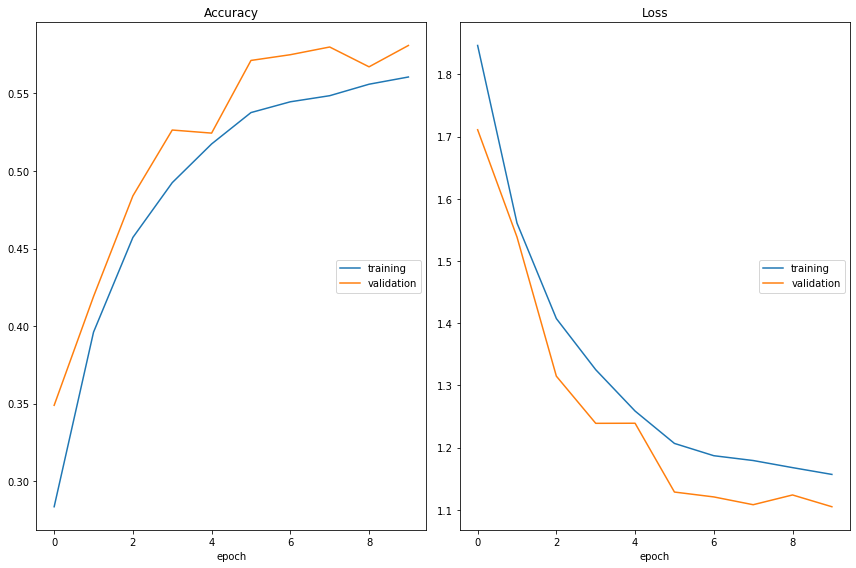

Accuracy
	training         	 (min:    0.283, max:    0.561, cur:    0.561)
	validation       	 (min:    0.349, max:    0.581, cur:    0.581)
Loss
	training         	 (min:    1.157, max:    1.847, cur:    1.157)
	validation       	 (min:    1.105, max:    1.711, cur:    1.105)

Epoch 00010: saving model to model_weights.h5
450/450 [==============================] - 362s 805ms/step - loss: 1.1572 - acc: 0.5606 - val_loss: 1.1051 - val_acc: 0.5810


In [30]:
epochs=10
train_steps=train_generator.n//train_generator.batch_size
validation_steps=test_generator.n//test_generator.batch_size
checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                          save_weights_only=True,mode='max',verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=0.1,min_lr=0.00001,model='auto')
callbacks=[PlotLossesKerasTF(),checkpoint,reduce_lr]

history=model.fit(
x=train_generator,
steps_per_epoch=train_steps,
epochs=epochs,
validation_data=test_generator,
validation_steps=validation_steps,
callbacks=callbacks)

In [35]:
import pickle
pickle.dump(model,open('model_save','wb'))

TypeError: can't pickle _thread.RLock objects

In [38]:
model_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)

In [39]:
history_json=history.to_json()
with open('history.json','w') as json_file:
    json_file.write(history_json)

AttributeError: 'History' object has no attribute 'to_json'

In [41]:
model.save('final.h5')